#Problem Statement
#An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#Goals and Objectives
#There are quite a few goals for this case study.

#Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
#There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. #Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


#Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

In [59]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [60]:
master = pd.read_csv('Leads.csv')

In [61]:
master.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [62]:
master.shape

(9240, 37)

In [63]:
#Removing lead number & prospect id 
master.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [64]:
#Also checking if there are any duplicates and removing them
master.drop_duplicates(inplace = True)

In [65]:
master.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,7959.000000,7822.000000,7959.000000,7822.000000,4444.000000,4444.000000
mean,0.399925,4.009460,566.193240,2.749776,14.113186,16.489199
std,0.489913,5.016726,551.563569,2.091107,1.279882,1.852572
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,2.000000,102.000000,1.500000,13.000000,15.000000
50%,0.000000,3.000000,332.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,1042.500000,4.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#Converting all the values to lower case
master = master.applymap(lambda s:s.lower() if type(s) == str else s)

In [66]:
#treating the columns that has null values
master = master.replace('Select', np.nan)

#Understanding Lead Conversion and Lead Origin

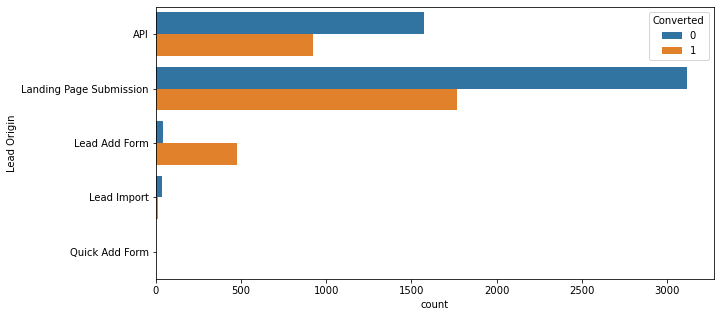

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Lead Origin", hue="Converted", data=master)
plt.show()

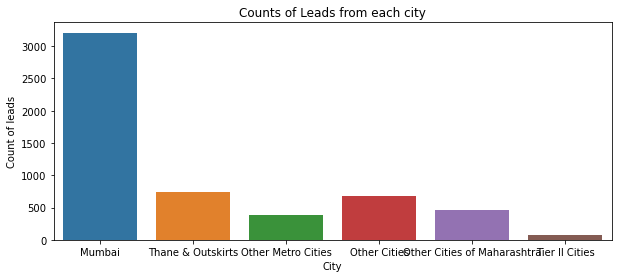

In [68]:
plt.figure(figsize=(10, 4))

#plotting the counts of data points per city
plt.subplot(1,1,1)
ax = sns.countplot(x = 'City', data = master)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each city')

plt.show()

**Inference**
* *Mumbai* is the most common city where the leads came from.

In [69]:
# hence replacing the null values in City column with Mumbai as its the most common one.

In [70]:
print(f"Total null values in city column : {master['City'].isnull().sum()}")
master['City'].fillna('Mumbai', inplace = True)


Total null values in city column : 2411


#plotting the counts of data points per specializations

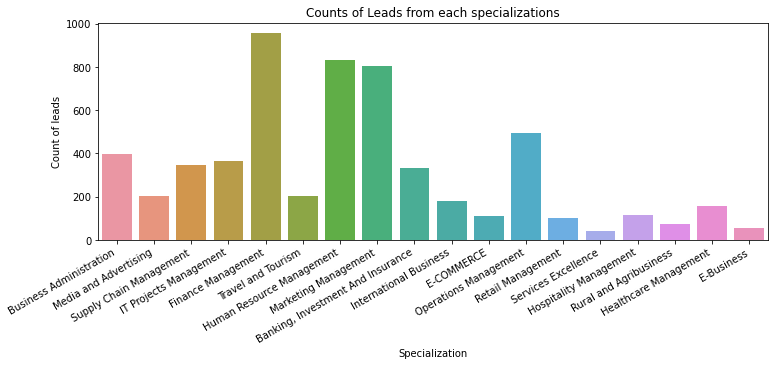

In [71]:
plt.figure(figsize=(12, 4))
plt.subplot(1,1,1)
ax = sns.countplot(x = 'Specialization', data = master)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each specializations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [72]:
#replacing the null values in City column with Others as all of them are nearly same and others can be a new category

print(f"Total null values in city column : {master['Specialization'].isnull().sum()}")
master['Specialization'].fillna('Others', inplace = True)


Total null values in city column : 2190


#plotting the counts of data points per Tags

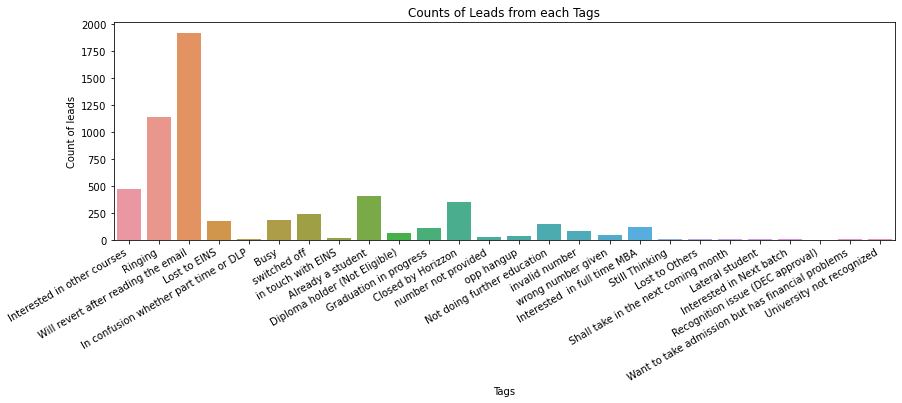

In [74]:
plt.figure(figsize=(14, 4))

plt.subplot(1,1,1)
ax = sns.countplot(x = 'Tags', data = master)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each Tags')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [75]:
#replacing the null values in City column with most common category
print(f"Total null values in city column : {master['Tags'].isnull().sum()}")
master['Tags'].fillna('Will revert after reading the email', inplace = True)


Total null values in city column : 2402


#plotting the counts of data points per What matters most to you in choosing a course

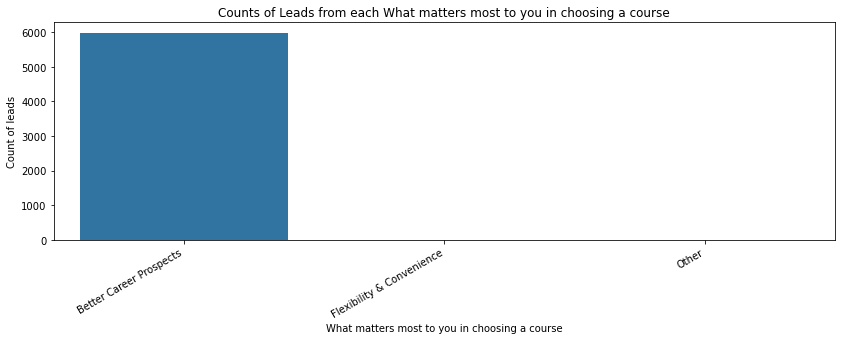

In [76]:
plt.figure(figsize=(14, 4))
plt.subplot(1,1,1)
ax = sns.countplot(x = 'What matters most to you in choosing a course', data = master)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each What matters most to you in choosing a course')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [ ]:
#replacing the null values in City column with most common category
print(f"Total null values in city column : {master['What matters most to you in choosing a course'].isnull().sum()}")
master['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)


#Dropping the columns which are having null values greater than 30%

In [78]:
df_null = pd.DataFrame(round((master.isnull().sum()/master.shape[0])*100,2))
df_null = df_null.sort_values(by=0,ascending=False)
df_null.rename(columns = {0:'Null%'}, inplace = True)

In [79]:
df_null[df_null['Null%']!=0]

,Null%
How did you hear about X Education,75.00
Lead Profile,71.88
Lead Quality,46.55
Asymmetrique Activity Score,44.16
Asymmetrique Activity Index,44.16
Asymmetrique Profile Index,44.16
Asymmetrique Profile Score,44.16
What matters most to you in choosing a course,24.75
What is your current occupation,24.51
Country,14.83


**Inference**
* As per above there are seven features where null% is greater than 30%.
* We can drop such columns as 30% data is missing in them.

In [80]:
#dropping the columns with missing values > 30%
master.drop(columns = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Index'], inplace = True)

In [81]:
master.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7959.000000,7822.000000,7959.000000,7822.000000
mean,0.399925,4.009460,566.193240,2.749776
std,0.489913,5.016726,551.563569,2.091107
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,102.000000,1.500000
50%,0.000000,3.000000,332.000000,2.000000
75%,1.000000,5.000000,1042.500000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


In [82]:
master.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [83]:
master.dropna(inplace = True)

In [84]:
master.shape

(4925, 28)

#EDA


#plotting the counts of data points per year

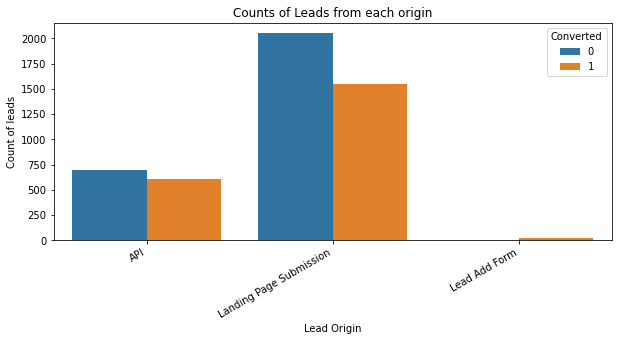

In [85]:
plt.figure(figsize=(10, 4))

plt.subplot(1,1,1)
ax = sns.countplot(x = 'Lead Origin', hue = 'Converted', data = master)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each origin')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

#Inference
#API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
#Lead Add Form has more than 90% conversion rate but count of lead are not very high.



#plotting the counts of leads per year

In [86]:
#There are some inconsistent names in lead source column, correcting them and  categorizing the most common sources as 'Others'
master['Lead Source'] = master['Lead Source'].replace(['google'], 'Google').replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'],'Others')


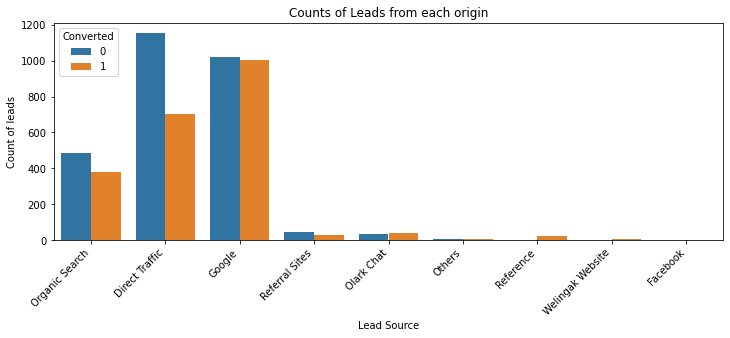

In [87]:
plt.figure(figsize=(12, 4))

plt.subplot(1,1,1)
ax = sns.countplot(x = 'Lead Source', hue = 'Converted', data = master)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each origin')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

#Inference
#Google and Direct traffic* sources generated the highest leads.


**Inference**
* There is a very high conversion from users under category *Will revert after reading the email*.

#Box Plot of Continuous Features

Boxplot for : TotalVisits


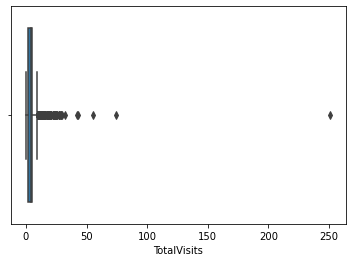

Boxplot for : Total Time Spent on Website


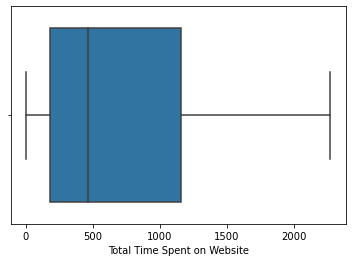

Boxplot for : Page Views Per Visit


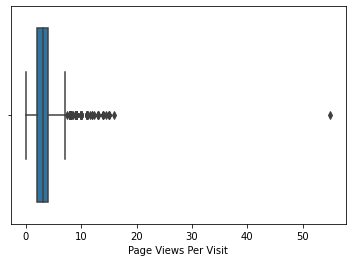

In [88]:
num_cols = ['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']

for i in num_cols:
    print('Boxplot for :',i)
    sns.boxplot(master[i])
    plt.show()

#Inference
#There are more outliers in *TotalVisits & Page Visits per View
#We'll handle these outliers by capping them in either average or with any other function.

## Pre-processing the categorical columns

In [92]:
master.select_dtypes(include = ['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [94]:
#Doing One Hot Encoding on categorical columns
OHE = pd.get_dummies(master[cat_cols], drop_first=True)

#appending the 
data = pd.concat([master.drop(columns = cat_cols), OHE], axis = 1)

In [95]:
data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,5.0,674,2.50,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,5.0,210,2.50,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building & Tuning

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Splitting the data into train & test datasets

In [97]:
#Separating the data into dependant and independant variables
X = data.drop(columns = ['Converted'])
y = data['Converted']

In [98]:
#Splitting the data into train and tests keeping 30% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [99]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [100]:
num_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

## Model building with scikitlearn

In [101]:
#Building the basic logistc regression model first and then optimising it going further ninitializing the model with default parameters
log_reg  = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [102]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

In [103]:
print(f"Accuracy we got on initially built model : {metrics.accuracy_score(y_test, y_pred)}")

Accuracy we got on initially built model : 0.45263870094722597


### Building confusion matrix

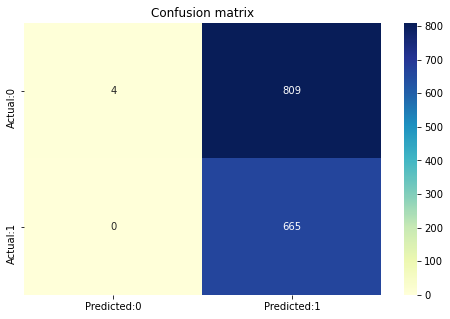

In [104]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

plt.title('Confusion matrix')
plt.show()

In [105]:
#getting the feature importance using already built model
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[abs(i) for i in log_reg.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False).head(10)

,feature,feature_importance
92,Tags_Closed by Horizzon,5.100802
100,Tags_Lost to EINS,4.417153
109,Tags_Will revert after reading the email,4.220409
91,Tags_Busy,1.970965
104,Tags_Ringing,1.549664
114,Tags_switched off,1.505683
115,Tags_wrong number given,1.257453
97,Tags_Interested in Next batch,1.098519
111,Tags_invalid number,1.082067
13,Do Not Email_Yes,1.061755


**Inference**
* *Tags, Lead Origin, Lead Source, Lead Notable Activity* are the top 4 features.
* Company should focus on these four features to get the lead conversion to increase significantly.

In [106]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [107]:
acc = (TP+TN)/float(TP+TN+FP+FN)
miss_cls = 1-((TP+TN)/float(TP+TN+FP+FN))
sen = TP/float(TP+FN)
specif = TN/float(TN+FP)
pos_pred = TP/float(TP+FP)
neg_pred = TN/float(TN+FN)
pos_lklyhd_rto = sensitivity/(1-specificity)
neg_lklyhd_rto = ((1-sensitivity)/specificity)

In [108]:
print(f"The acuuracy of the model : {acc}")

print(f"The Miss-classification (1-Accuracy) : {miss_cls}")

print(f"Sensitivity or True Positive Rate (TP / (TP+FN)) : {sen}")

print(f"Specificity or True Negative Rate (TN / (TN+FP)) : {specif}")

print(f"Positive Predictive value (TP / (TP+FP)) : {pos_pred}")

print(f"Negative predictive Value (TN / (TN+FN)) : {neg_pred}")

print(f"Positive Likelihood Ratio (Sensitivity / (1-Specificity)) : {pos_lklyhd_rto}")

print(f"Negative likelihood Ratio ((1-Sensitivity) / Specificity) : {neg_lklyhd_rto}")


The acuuracy of the model : 0.45263870094722597
The Miss-classification (1-Accuracy) : 0.5473612990527741
Sensitivity or True Positive Rate (TP / (TP+FN)) : 1.0
Specificity or True Negative Rate (TN / (TN+FP)) : 0.004920049200492005
Positive Predictive value (TP / (TP+FP)) : 0.45115332428765265
Negative predictive Value (TN / (TN+FN)) : 1.0
Positive Likelihood Ratio (Sensitivity / (1-Specificity)) : 1.0049443757725587
Negative likelihood Ratio ((1-Sensitivity) / Specificity) : 0.0


In [109]:
#getting the probabilities of both conversion and non-conversion from log_reg model that we built earlier
y_pred_prob=log_reg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Conversion(0)','Prob of No Conversion (1)'])
y_pred_prob_df.head()

,Prob of Conversion(0),Prob of No Conversion (1)
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


### Area Under the Curve (AUC)

* Area under the ROC curve usually quantifies the model accuracy in case of classification.
* The higher the area, the greater is the disparity between True and False positives and stronger is the model in classifying the data points in training set.
* An area of 0.5 states that a model is no better than a random classification model.
* Any good classifier should strive to be towards the area of 1 to be ideal.

In [110]:
#selecting best possible threshold on probability to get the best classification results
from sklearn.preprocessing import binarize
for i in range(1,10):
    cm2=0
    y_pred_prob_yes=log_reg.predict_proba(X_test)
    y_pred2=binarize(X = y_pred_prob_yes,threshold = i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
           'accuracy is',(TP+TN)/float(TP+TN+FP+FN),'\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')


With 0.1 threshold the Confusion Matrix is  
 [[  0 813]
 [  0 665]] 
 with 665 correct predictions and 0 Type II errors( False Negatives) 

 accuracy is 0.45263870094722597 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  
 [[  2 811]
 [  0 665]] 
 with 667 correct predictions and 0 Type II errors( False Negatives) 

 accuracy is 0.45263870094722597 

 Sensitivity:  1.0 Specificity:  0.0024600246002460025 



With 0.3 threshold the Confusion Matrix is  
 [[  2 811]
 [  0 665]] 
 with 667 correct predictions and 0 Type II errors( False Negatives) 

 accuracy is 0.45263870094722597 

 Sensitivity:  1.0 Specificity:  0.0024600246002460025 



With 0.4 threshold the Confusion Matrix is  
 [[  2 811]
 [  0 665]] 
 with 667 correct predictions and 0 Type II errors( False Negatives) 

 accuracy is 0.45263870094722597 

 Sensitivity:  1.0 Specificity:  0.0024600246002460025 



With 0.5 threshold the Confusion Matrix is  
 [[  4 809]
 [  0 665]] 
 with 66

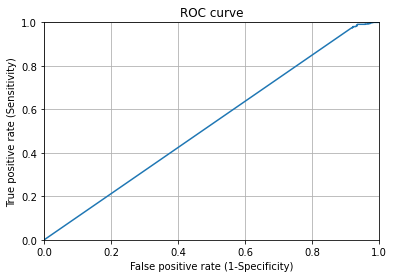

In [111]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

**Inference**
* It is a plot of *TPR Vs FPR* for all possible choices of thresholds.
* Any model with significant classification accuracy should have more TPs than FPs at all thresholds.


In [112]:
print(f"ROC AUC score : {metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])}")

ROC AUC score : 0.5287055276567804


#### Sensitivity

In [113]:
print(f"Sensitivity : {(TP/(TP+FN))*100}")

Sensitivity : 100.0


#### Specificity

In [114]:
print(f"Specificity : {(TN/(TN+FP))*100}")

Specificity : 0.4920049200492005


# Model Interpretation

#After running the model on the Test Data these are the figures we obtain:

    Accuracy : ROC AUC score :52.87%
    Sensitivity: 100%
    Specificity : 49.20%  
<br>
* While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
* Accuracy, Sensitivity and Specificity values of test set are approximately closer to the respective values calculated using trained set.
* Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 52.9%
* Hence overall this model does not seem to be good.

# Conclusion

It was found that the variables that mattered the most in the potential leads are (In descending order) :

* The total time spend on the Website.
* Total number of visits.
* When the lead source was:
    * Google
    * Direct traffic
    * Organic search
* When the last activity was:
    * SMS
    * Olark chat conversation

Keeping these in mind the X Education can flourish as they have a very low chance to get almost all the potential buyers to change their mind and buy their courses hence they should focus on other marketing activity to improve awareness and drwaw more customers on to thier website..